In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import os

In [3]:
if not os.path.isdir('Properties_philly_Kraggle_v2.csv'):
  print(os.listdir("/content"))

['.config', 'Properties_philly_Kraggle_v2.csv', 'sample_data']


In [ ]:
# philly_properties = np.genfromtxt('Properties_philly_Kraggle_v2.csv', delimiter=',')

Read in table to Pandas Dataframe

In [49]:
import pandas as pd
# df=pd.read_csv('Properties_philly_Kraggle_v2.csv', sep=',')
df=pd.read_csv('Properties_philly_Kraggle_v2.csv', sep=',', index_col=False)
df.dropna(inplace=True)
df.reset_index()
df.values

array([['2327 E SERGEANT ST ',
        '2327 E SERGEANT ST , Philadelphia, PA 19125',
        'September 13  2016', ..., '2', 'SingleFamily', '240,254.55'],
       ['4466 TOLBUT ST ', '4466 TOLBUT ST , Philadelphia, PA 19136',
        'August 2  2016', ..., '3', 'Townhouse', '150,937.50'],
       ['134 E WALNUT LN ', '134 E WALNUT LN , Philadelphia, PA 19144',
        'August 2  2016', ..., '3', 'SingleFamily', '225,483.33'],
       ...,
       ['653 N 33RD ST ', '653 N 33RD ST , Philadelphia, PA 19104',
        'August 2  2016', ..., '5', 'MultiFamily2To4', '21,166.67'],
       ['5423 WOODBINE AVE ',
        '5423 WOODBINE AVE , Philadelphia, PA 19131', 'August 2  2016',
        ..., '6', 'SingleFamily', '126,401.60'],
       ['730 S CECIL ST ', '730 S CECIL ST , Philadelphia, PA 19143',
        'August 2  2016', ..., '3', 'Townhouse', '38,900.00']],
      dtype=object)

Remove last index of n/a data

In [50]:
# Fix index after dropna
df = df[:-1]

Drop columns that are not needed

In [51]:
df.drop(['Address', 'Opening Bid', 'Book/Writ', 'OPA', 'Ward', 'Sheriff Cost', 'Advertising', 'Other', 'Record Deed', 'Zillow Estimate', 'Sale Date', 'Zillow Address', 'Attorney', 'Seller', 'Buyer'], axis=1, inplace=True)

Rename oddly formatted columns

In [52]:
df.rename(columns={'finished \n(SqFt)':'SqFt', 
                   'Sale Price/bid price': 'Sale Price', 
                   'Zillow Address': 'Address', 
                   ' bedrooms ': 'bedrooms', 
                   ' Avg Walk&Transit score  ': 'Avg Walk&Transit score',
                   ' Violent Crime Rate ': 'Violent Crime Rate',
                   ' School Score  ': 'School Score',
                   ' bathrooms ': 'bathrooms'}, inplace=True)

In [53]:
df.columns

Index(['Sale Price', 'Postal Code', 'Water', 'PGW', 'Avg Walk&Transit score',
       'Violent Crime Rate', 'School Score', 'Rent Estimate', 'taxAssessment',
       'yearBuilt', 'SqFt', 'bathrooms', 'bedrooms', 'PropType',
       'Average comps'],
      dtype='object')

## Analyze Sale Prices
And classify data into quantiles

In [54]:
prices = df['Sale Price']
# prices.values
prices = prices.to_numpy()
prices_int = []
for price in prices:
  prices_int.append(int(price[1:].replace(',', '')))
prices = np.array(prices_int)
prices[1]

8500

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [17.50, 13.50]
plt.rcParams["figure.autolayout"] = True

prices_index = np.array(list(range(prices.size)))

plt.title("Graph of Sale Price Data")
plt.plot(prices_index, prices, color="green")

plt.show()

In [56]:
quartile_0 = min(prices) 
quartile_1 = np.quantile(prices, .25)
quartile_2 = np.quantile(prices, .50)
quartile_3 = np.quantile(prices, .75)
quartile_4 = max(prices)
print(quartile_0, quartile_1, quartile_2, quartile_3, quartile_4)

5200 20900.0 40000.0 80000.0 350000


In [57]:
Sales_price_category = []
for price in prices:
  if price < quartile_1:
    Sales_price_category.append(float(0))
  elif price < quartile_2:
    Sales_price_category.append(float(1))
  elif price < quartile_3:
    Sales_price_category.append(float(2))
  else:
    Sales_price_category.append(float(3))
Sales_price_category[-10:]

[3.0, 2.0, 3.0, 2.0, 1.0, 3.0, 2.0, 2.0, 1.0, 3.0]

In [58]:
df['Sales Price Category'] = Sales_price_category
df.drop(columns=['Sale Price'], inplace=True)
df[-10:]

,Postal Code,Water,PGW,Avg Walk&Transit score,Violent Crime Rate,School Score,Rent Estimate,taxAssessment,yearBuilt,SqFt,bathrooms,bedrooms,PropType,Average comps,Sales Price Category
604,19125.0,1008.58,0.00,82.25,1.13,15.87,"1,500.00","164,500.00",1918.0,1050.0,1,4,Townhouse,"186,845.45",3.0
605,19135.0,2997.64,1339.18,70.00,0.52,21.53,975,"82,400.00",1950.0,992.0,1,2,Townhouse,"75,117.89",2.0
606,19120.0,4457.68,29.45,79.88,0.50,10.94,"1,150.00","106,100.00",1950.0,1188.0,2,3,Townhouse,"99,662.50",3.0
607,19139.0,692.75,115.49,80.08,1.54,3.34,"1,050.00","32,400.00",1920.0,1209.0,1,3,Condominium,"42,300.00",2.0
608,19134.0,671.16,0.00,71.25,0.97,11.05,"1,000.00","29,400.00",1910.0,984.0,1,3,Townhouse,"29,666.67",1.0
609,19125.0,3043.45,1296.82,82.25,1.13,15.87,"1,350.00","74,700.00",1875.0,1120.0,2,3,Condominium,"117,708.33",3.0
610,19132.0,1274.85,556.48,75.50,1.72,5.63,"1,250.00","13,400.00",1936.0,2288.0,1,5,Townhouse,"72,625.00",2.0
611,19139.0,53187.97,4930.07,80.08,1.54,3.34,"1,100.00","43,900.00",1925.0,1238.0,1,3,Townhouse,"56,029.00",2.0
612,19104.0,1823.79,379.75,81.79,0.65,28.40,"1,300.00","16,200.00",1935.0,2315.0,4,5,MultiFamily2To4,"21,166.67",1.0
613,19131.0,1937.32,7101.25,65.75,0.29,8.34,"1,450.00","65,700.00",1925.0,3096.0,2,6,SingleFamily,"126,401.60",3.0


## Pre process data for the Nerual Network

In [ ]:
# df.drop(columns=['Address', 'Attorney', 'Seller', 'Buyer'], inplace=True)

In [59]:
PropType = df['PropType']
prop_types = set()
for prop in PropType:
  prop_types.add(prop)
prop_types = list(prop_types)
new_prop = list()
for prop in PropType:
  new_prop.append(float(prop_types.index(prop)))
df['PropType'] = new_prop

Account for errror fields in the tables

In [60]:
df = df[df['bathrooms'] != ' -   ']
df = df[df['bedrooms'] != ' -   ']
df = df[df['Avg Walk&Transit score'] != ' -   ']
df = df[df['Violent Crime Rate'] != ' -   ']
df = df[df['School Score'] != ' -   ']
df = df.astype({'bathrooms': float, 'bedrooms': float})

In [61]:
for column_name in ['Rent Estimate', 'taxAssessment', 'Average comps']:
  new_col = list()
  for cell in df[column_name]:
    new_col.append(float(cell.replace(',', '')))
  df[column_name] = new_col

In [62]:
df.dtypes

Postal Code               float64
Water                     float64
PGW                       float64
Avg Walk&Transit score    float64
Violent Crime Rate        float64
School Score              float64
Rent Estimate             float64
taxAssessment             float64
yearBuilt                 float64
SqFt                      float64
bathrooms                 float64
bedrooms                  float64
PropType                  float64
Average comps             float64
Sales Price Category      float64
dtype: object

In [63]:
df = df.sample(frac = 1)
train_samples = df[:500].drop(columns=['Sales Price Category'])
train_labels = df[:500]['Sales Price Category']
test_samples = df[500:].drop(columns=['Sales Price Category'])
test_labels = df[500:]['Sales Price Category']

In [ ]:
train_samples

In [65]:
train_samples = train_samples.to_numpy()
train_labels = train_labels.to_numpy()
test_samples = test_samples.to_numpy()
test_labels = test_labels.to_numpy()

In [66]:
train_samples.dtype

dtype('float64')

## Building the neural network model

In [67]:
model = None

In [68]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [69]:
model = Sequential([
    Dense(units=16, input_shape=(14,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=4, activation='softmax')
])

In [70]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                240       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
Total params: 916
Trainable params: 916
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

In [72]:
model.fit(x=train_samples,
          y=train_labels, validation_split=0.1,
          batch_size=10,
          epochs=200,
          shuffle=True,
          verbose=2
)

Epoch 1/200
45/45 - 1s - loss: 3819.7134 - accuracy: 0.2667 - val_loss: 2305.0569 - val_accuracy: 0.2400 - 841ms/epoch - 19ms/step
Epoch 2/200
45/45 - 0s - loss: 1410.9448 - accuracy: 0.2911 - val_loss: 663.0961 - val_accuracy: 0.3400 - 84ms/epoch - 2ms/step
Epoch 3/200
45/45 - 0s - loss: 813.6852 - accuracy: 0.2711 - val_loss: 562.4999 - val_accuracy: 0.4200 - 79ms/epoch - 2ms/step
Epoch 4/200
45/45 - 0s - loss: 697.4105 - accuracy: 0.3111 - val_loss: 502.1662 - val_accuracy: 0.4600 - 80ms/epoch - 2ms/step
Epoch 5/200
45/45 - 0s - loss: 648.6060 - accuracy: 0.3244 - val_loss: 495.1388 - val_accuracy: 0.3400 - 85ms/epoch - 2ms/step
Epoch 6/200
45/45 - 0s - loss: 615.0458 - accuracy: 0.3311 - val_loss: 437.5821 - val_accuracy: 0.3800 - 87ms/epoch - 2ms/step
Epoch 7/200
45/45 - 0s - loss: 581.7440 - accuracy: 0.3400 - val_loss: 416.8485 - val_accuracy: 0.4400 - 105ms/epoch - 2ms/step
Epoch 8/200
45/45 - 0s - loss: 554.0734 - accuracy: 0.3422 - val_loss: 412.0222 - val_accuracy: 0.4400 - 

In [74]:
predictions = model.predict(x=test_samples, batch_size=10, verbose=1) 

8/8 [==============================] - 0s 2ms/step


In [75]:
for i in predictions:
    print(i)

[1.9209437e-23 0.0000000e+00 1.0000000e+00 0.0000000e+00]
[3.4329188e-13 0.0000000e+00 1.0000000e+00 9.4134917e-33]
[1.7044647e-24 9.9534082e-01 4.6591237e-03 0.0000000e+00]
[0.000000e+00 0.000000e+00 6.328928e-30 1.000000e+00]
[0.000000e+00 2.296235e-10 1.000000e+00 0.000000e+00]
[2.0006111e-19 0.0000000e+00 1.0000000e+00 0.0000000e+00]
[0.6547844  0.         0.34521565 0.        ]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[3.5643016e-10 0.0000000e+00 1.0000000e+00 0.0000000e+00]
[9.9998569e-01 2.6422262e-33 1.4257644e-05 0.0000000e+00]
[9.9969363e-01 1.0395137e-36 3.0639410e-04 0.0000000e+00]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[4.5203248e-21 0.0000000e+00 1.0000000e+00 1.3471043e-32]
[1.0000000e+00 4.4561642e-17 1.1328860e-13 0.0000000e+00]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[4.021773e-09 0.000000e+00 1.000000e+00 0.000000e+00]
[1. 0. 0. 0.]
[1.0000000e+00 4.5341371e-30 1.0351761e-17 0.0000000e+00]
[0.00273223 0.         0.99726784 0.        ]
[9.9995816e-01 2.3841750e-18 4.1802210e-05 0.0000000e+00]
[1.2730662

In [76]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [77]:
for i in rounded_predictions:
    print(i)

2
2
1
3
2
2
0
0
0
2
0
0
3
0
2
0
3
3
2
0
0
2
0
2
0
0
2
2
0
0
3
2
0
3
2
3
2
0
3
3
2
3
2
2
2
0
2
2
2
0
2
0
2
2
0
3
2
3
0
2
2
0
2
2
0
3
2
3
0
2
2
3
0
3


# Confusion Matrix

In [78]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [79]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [80]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[14  0  7  0]
 [10  1  9  0]
 [ 1  0 13  3]
 [ 0  0  3 13]]


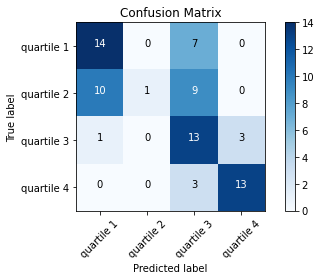

In [81]:
cm_plot_labels = ['quartile 1','quartile 2', 'quartile 3', 'quartile 4']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# Analysis of the confusion Matrix

It would appear that the house prices that are hardest to predict for the model are the Level 2/4 ones -- not the worst but not good.
This is partly a result of the distribution of the data into 4 arbitrary categories. However it is clear that the model can predict the cheapest and most expensive houses with some ease.
